<a href="https://colab.research.google.com/github/Seenuprime/Deep-Learning/blob/main/CV_Convolutional_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow

Computer vision is the practice of writting algorithms which can discover patterns in visual data. such as cameras of self-driving cars recognizing the object in front.

**Getting the data**

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

## Unizip downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-04-26 05:51:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  75.7MB/s    in 1.4s    

2024-04-26 05:51:30 (75.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



We are using food 101 data from kaggle

In [2]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [3]:
## Finding out how many images are there in the file
import os
num_images_train_pizza = len(os.listdir('pizza_steak/train/pizza'))
num_images_train_pizza

750

To visualize our images, first get the class names programmatically

In [4]:
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Creates a list of class names from the subdirectory in the training folder
print(class_names)

['pizza' 'steak']


In [5]:
## Visualizing our images
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random

def view_rand_images(target_dir, target_class):
  target_folder = target_dir +'/'+  target_class

  # getting the random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(">", random_image)

  ## reading the image and ploting it
  img = mping.imread(target_folder +'/'+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

  print(f"Image shape: {img.shape}")
  return img

> ['3644733.jpg']
Image shape: (512, 512, 3)


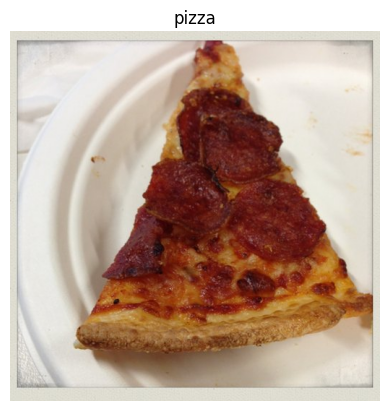

In [6]:
rand_image = view_rand_images('pizza_steak/train', 'pizza')

In [7]:
print(rand_image)

[[[223 221 209]
  [224 222 210]
  [225 223 211]
  ...
  [229 227 215]
  [227 225 213]
  [222 220 208]]

 [[223 221 209]
  [223 221 209]
  [224 222 210]
  ...
  [226 224 212]
  [226 224 212]
  [224 222 210]]

 [[223 221 209]
  [224 222 210]
  [224 222 210]
  ...
  [222 220 208]
  [224 222 210]
  [223 221 209]]

 ...

 [[220 220 208]
  [219 219 207]
  [218 218 206]
  ...
  [221 219 207]
  [223 221 209]
  [221 219 207]]

 [[221 221 209]
  [220 220 208]
  [220 220 208]
  ...
  [223 221 209]
  [225 223 211]
  [223 221 209]]

 [[222 222 210]
  [222 222 210]
  [222 222 210]
  ...
  [221 219 207]
  [224 222 210]
  [221 219 207]]]


In [8]:
# print(rand_image)(224, 224, 3) --> 255 Height 255 Width 3 color channels.
## each values in the array elements represents the color channels of every pixel
## ex: [ 58  43  20] one pixel with color 58 red, 43 green, 20 blue

Machine learning and neural network prefers the values with between 0 and 1. (normalizing)

## Building Convolutional Neural Network

* Loading the images
* Preprocessing the images (image values)
* Building a CNN
* Compiling the CNN
* fitting the CNN

**Using google's T4 GPU**

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

## Preprocessing the data (scaling/normalize)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

## Setup paths to our directory
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

## Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)


## Building the CNN (same as the Tiny VGG on CNN explainer website)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)), ## Input layer
    tf.keras.layers.Conv2D(10, 3, activation='relu'),

    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),

    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## Compile our CNN
model.compile(
    loss='binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

## fit
model.fit(train_data, ## the flow_from_directory() will automatically create the labels
          epochs = 5,
          steps_per_epoch = len(train_data),
          validation_data = valid_data,
          validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 99s 2s/step - loss: 0.6109 - accuracy: 0.6620 - val_loss: 0.5029 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 97s 2s/step - loss: 0.4497 - accuracy: 0.7933 - val_loss: 0.4060 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 95s 2s/step - loss: 0.4169 - accuracy: 0.8193 - val_loss: 0.3273 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 98s 2s/step - loss: 0.3646 - accuracy: 0.8400 - val_loss: 0.3321 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 95s 2s/step - loss: 0.3214 - accuracy: 0.8713 - val_loss: 0.3275 - val_accuracy: 0.8780


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Understanding the above Deeply

In [11]:
## Defining the directory path
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

Next step is to turn our data into **batchs**.

batch is a small subset of data, Rather look at all the images at one time, a model might look 32 at a time.

* all the images might not fit into the memoryof our processor, so we give model batch by batch.

* Trying to learn the patterns in all the images in one hit could result in the model not being able to learn very well.


In [12]:
## Creating train data test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
## Load in our data from our directory and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, ## target directory
                                               batch_size = 32,
                                               target_size = (224, 224), ## target size (height, width)
                                               class_mode = 'binary', ## type of data you're working with
                                               seed = 42)  ## size of minibatchs to load data into

test_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [14]:
## Get a sample of train data batch
images, labels = train_data.next() # get the next "batch" of the images/labels in train_data
len(images), len(labels)

(32, 32)

In [15]:
## Get the first two images
images[0], images[0].shape

(array([[[0.42352945, 0.43137258, 0.34509805],
         [0.3137255 , 0.32941177, 0.2392157 ],
         [0.26666668, 0.28235295, 0.18431373],
         ...,
         [0.42352945, 0.34509805, 0.3803922 ],
         [0.427451  , 0.34901962, 0.39607847],
         [0.45098042, 0.36862746, 0.427451  ]],
 
        [[0.2901961 , 0.30588236, 0.21568629],
         [0.45882356, 0.47450984, 0.37647063],
         [0.2627451 , 0.28627452, 0.18431373],
         ...,
         [0.39607847, 0.34117648, 0.34117648],
         [0.4156863 , 0.36862746, 0.38431376],
         [0.39607847, 0.34901962, 0.3647059 ]],
 
        [[0.3647059 , 0.40000004, 0.29411766],
         [0.38823533, 0.42352945, 0.31764707],
         [0.30588236, 0.34117648, 0.23529413],
         ...,
         [0.34509805, 0.3254902 , 0.30980393],
         [0.30980393, 0.29803923, 0.2784314 ],
         [0.3372549 , 0.3254902 , 0.30588236]],
 
        ...,
 
        [[0.5137255 , 0.5019608 , 0.54509807],
         [0.52156866, 0.50980395, 0.54509

##Creating CNN

In [16]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)), ## Input layer

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## Compile our CNN
model_2.compile(
    loss='binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

## fit
model_2_history = model_2.fit(train_data, ## the flow_from_directory() will automatically create the labels
          epochs = 5,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 131s 3s/step - loss: 0.7155 - accuracy: 0.6960 - val_loss: 0.4335 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 119s 3s/step - loss: 0.3799 - accuracy: 0.8427 - val_loss: 0.3714 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 111s 2s/step - loss: 0.2370 - accuracy: 0.9173 - val_loss: 0.3668 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 120s 3s/step - loss: 0.0773 - accuracy: 0.9853 - val_loss: 0.4358 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 127s 3s/step - loss: 0.0231 - accuracy: 0.9967 - val_loss: 0.4866 - val_accuracy: 0.8020


In [17]:
len(train_data), len(test_data)

(47, 16)

In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

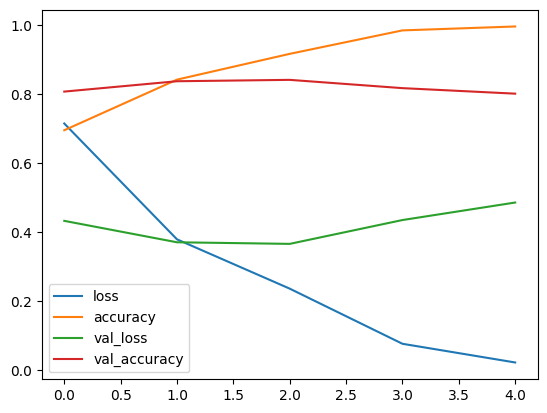

In [19]:
import pandas as pd
pd.DataFrame(model_2_history.history).plot()

**Reduce overfitting:-**
* Add data augmentation
* Add Regulation layers (also know as reduce overfitting) (MaxPool2D)
* Add more Data


In [20]:
## Creating the model (MaxPool2D)
tf.random.set_seed(42)

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)), ## Input layer
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(
    loss='binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

model_3_history = model_3.fit(train_data, ## the flow_from_directory() will automatically create the labels
          epochs = 5,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 47s 990ms/step - loss: 0.6286 - accuracy: 0.6500 - val_loss: 0.4857 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 52s 1s/step - loss: 0.4600 - accuracy: 0.7907 - val_loss: 0.4482 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 49s 1s/step - loss: 0.4053 - accuracy: 0.8313 - val_loss: 0.4445 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 45s 960ms/step - loss: 0.3415 - accuracy: 0.8640 - val_loss: 0.4095 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 46s 981ms/step - loss: 0.2846 - accuracy: 0.8827 - val_loss: 0.3431 - val_accuracy: 0.8580


In [21]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 29160)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                

Finding data augmentation

In [22]:
## Create ImageDataGenerator training instance with data augmentation
train_data_augmentation = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

## Creating ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

## Creating ImageDataGenerator without data augmentation for taining dataset
test_datagen = ImageDataGenerator(rescale=1./255)

Visualizing Data augmentation

In [40]:
## Import data and augment it from training directory
print("Augmented training data: ")
training_data_augmented = train_data_augmentation.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) ##only for demonstration purpose

## Creating non-augmented training data batches
print("Non-augmented training data: ")
trainig_data_non_augmented = train_datagen.flow_from_directory(train_dir,
                                                               target_size=(224, 224),
                                                               batch_size=32,
                                                               class_mode='binary',
                                                               shuffle=False)

## Creating non-augmented test data batches
print("Non-augmented test data: ")
test_data_non_augmented = test_datagen.flow_from_directory(test_dir,
                                                           batch_size=32,
                                                           target_size=(224, 224),
                                                           class_mode='binary',
                                                           shuffle=False)


Augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented test data: 
Found 500 images belonging to 2 classes.


**Note:** Data augmentation only performed on training data. Using `ImageDataGenerator` built-in augmentation parameters our images are left as they are in the directory but are modefied as ther're loaded into the model.

In [41]:
## Visualizing the augmented data
images, labels = trainig_data_non_augmented.next()

augmented_images, augmented_labels = training_data_augmented.next() ##Note labels are not augmented only the data (images)

(-0.5, 223.5, 223.5, -0.5)

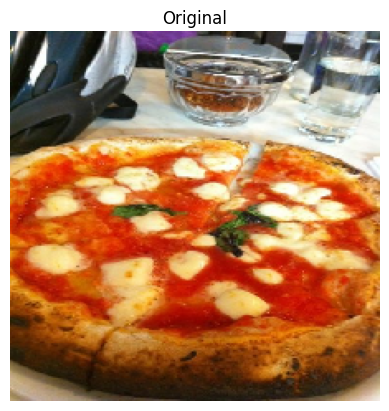

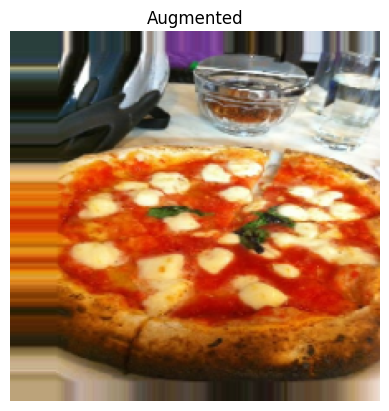

In [42]:
## Showing the Original image and Augmented image
import random

rand_index = random.randint(0, 32) ##Because our batch containes only 32 images

plt.imshow(images[rand_index])
plt.title('Original')
plt.axis(False)
plt.figure()

plt.imshow(augmented_images[rand_index])
plt.title("Augmented")
plt.axis(False)

## Building Model on augmented data

In [43]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [44]:
model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(training_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(training_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 80s 2s/step - loss: 0.7452 - accuracy: 0.5047 - val_loss: 0.6841 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 92s 2s/step - loss: 0.6905 - accuracy: 0.5013 - val_loss: 0.6787 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 90s 2s/step - loss: 0.6897 - accuracy: 0.5447 - val_loss: 0.6664 - val_accuracy: 0.5820
Epoch 4/5
47/47 [==============================] - 88s 2s/step - loss: 0.6812 - accuracy: 0.5773 - val_loss: 0.6051 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 97s 2s/step - loss: 0.6510 - accuracy: 0.6167 - val_loss: 0.5768 - val_accuracy: 0.6940


In [52]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 26, 26, 10)       

<Axes: >

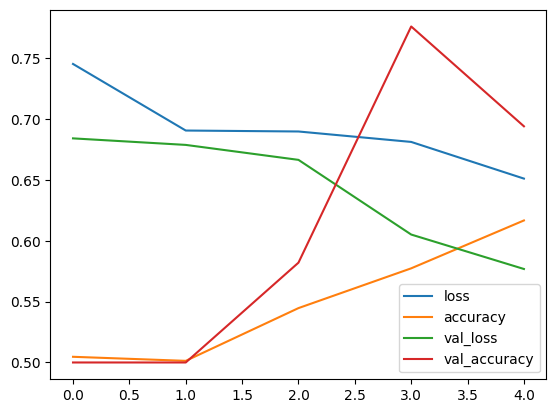

In [53]:
pd.DataFrame(history_4.history).plot()

**Shuffling our training augmented data and train another model**

In [45]:
training_data_augmented_shuffled = train_data_augmentation.flow_from_directory(train_dir,
                                                                               target_size=(224, 224),
                                                                               batch_size=32,
                                                                               class_mode = 'binary',
                                                                               shuffle=True)

Found 1500 images belonging to 2 classes.


In [50]:
model_5 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_5 = model_5.fit(training_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch = len(training_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 93s 2s/step - loss: 0.6919 - accuracy: 0.5280 - val_loss: 0.6470 - val_accuracy: 0.6500
Epoch 2/5
47/47 [==============================] - 65s 1s/step - loss: 0.6011 - accuracy: 0.7140 - val_loss: 0.4071 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 69s 1s/step - loss: 0.4847 - accuracy: 0.7713 - val_loss: 0.3589 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 65s 1s/step - loss: 0.4723 - accuracy: 0.7773 - val_loss: 0.3373 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 69s 1s/step - loss: 0.4609 - accuracy: 0.7880 - val_loss: 0.3245 - val_accuracy: 0.8720


In [51]:
model_5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 26, 26, 10)      

<Axes: >

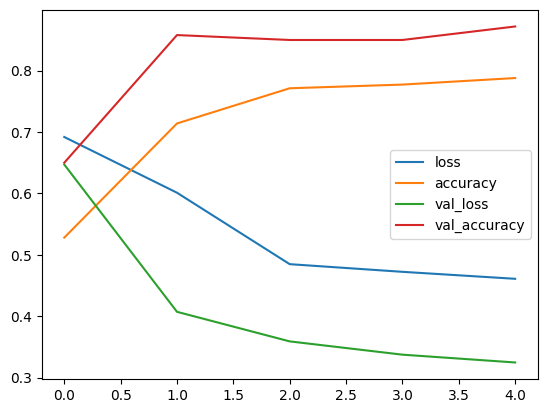

In [54]:
pd.DataFrame(history_5.history).plot()